<a href="https://colab.research.google.com/github/jiissung/ECON3916-Statistical-Machine-Learning/blob/main/Class%205/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

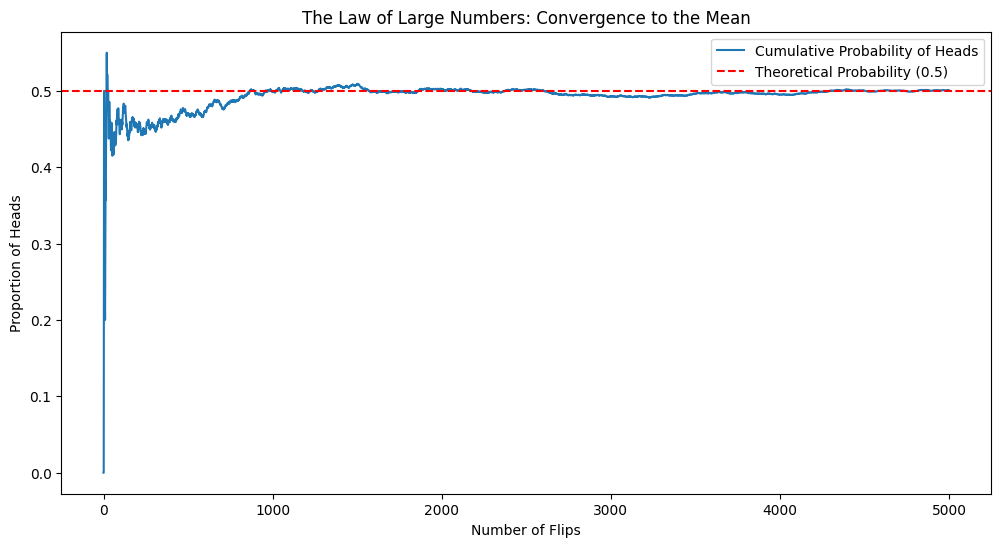

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_law_of_large_numbers(n_flips):
    flips = np.random.randint(0, 2, size=n_flips)
    cumulative_averages = np.cumsum(flips) / np.arange(1, n_flips + 1)
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_averages, label='Cumulative Probability of Heads')
    plt.axhline(0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')
    plt.title('The Law of Large Numbers: Convergence to the Mean')
    plt.xlabel('Number of Flips')
    plt.ylabel('Proportion of Heads')
    plt.legend()
    plt.show()

simulate_law_of_large_numbers(5000)

In [4]:
def monty_hall_sim(n_games):
    switch_wins = 0
    stay_wins = 0

    for _ in range(n_games):
        doors = [0, 1, 2]
        prize = np.random.choice(doors)
        choice = np.random.choice(doors)

        openable_doors = [d for d in doors if d != prize and d != choice]
        host_opens = np.random.choice(openable_doors)

        if choice == prize:
            stay_wins += 1

        switch_choice = [d for d in doors if d != choice and d != host_opens]
        if switch_choice[0] == prize:
            switch_wins += 1

    print(f"Win Rate (Stay): {stay_wins/n_games:.2%}")
    print(f"Win Rate (Switch): {switch_wins/n_games:.2%}")

monty_hall_sim(10000)

Win Rate (Stay): 33.53%
Win Rate (Switch): 66.47%


Probability of Revenue Decline: 17.96%
95% Value at Risk (Worst Case): $9,619,544.58


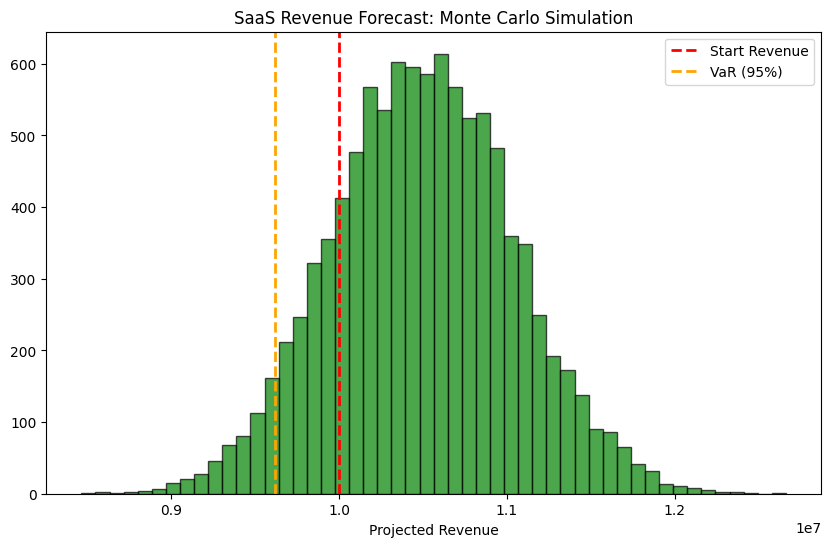

In [13]:
def saas_risk_model(n_sims):
    base_rev = 10_000_000

    churn_sims = np.random.normal(0.10, 0.02, n_sims)
    sales_sims = np.random.normal(1_500_000, 500_000, n_sims)
    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    prob_loss = np.mean(net_revenue < base_rev)

    var_95 = np.percentile(net_revenue, 5)

    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title('SaaS Revenue Forecast: Monte Carlo Simulation')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10000)

Model: (Student's t)
Probability of Revenue Decline: 20.83%
95% Value at Risk (Worst Case): $9,289,143.34


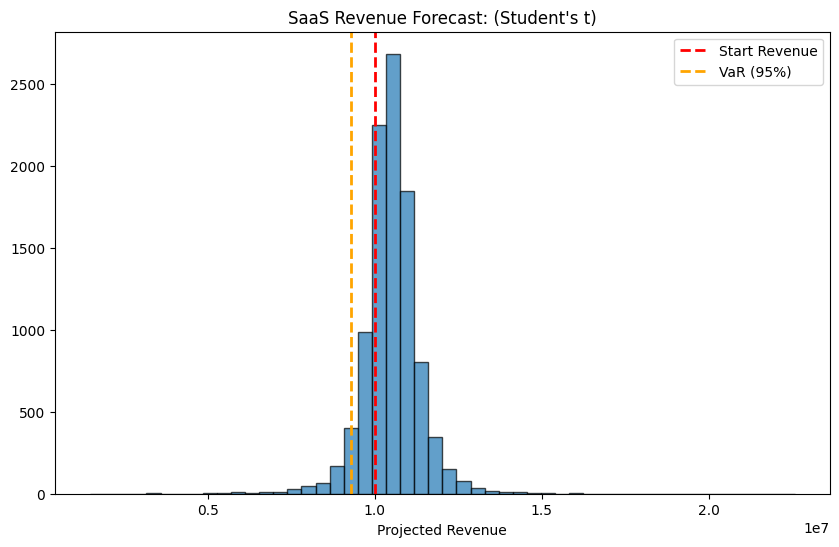

In [14]:
def saas_risk_model(n_sims):
    base_rev = 10_000_000

    churn_sims = np.random.normal(0.10, 0.02, n_sims)

    sales_sims = np.random.standard_t(df=3, size=n_sims)
    sales_sims = sales_sims * 500_000 + 1_500_000


    model_label = "(Student's t)"

    net_revenue = base_rev * (1 - churn_sims) + sales_sims

    prob_loss = np.mean(net_revenue < base_rev)
    var_95 = np.percentile(net_revenue, 5)

    print(f"Model: {model_label}")
    print(f"Probability of Revenue Decline: {prob_loss:.2%}")
    print(f"95% Value at Risk (Worst Case): ${var_95:,.2f}")

    plt.figure(figsize=(10,6))
    plt.hist(net_revenue, bins=50, alpha=0.7, edgecolor='black')
    plt.axvline(base_rev, color='red', linestyle='dashed', linewidth=2, label='Start Revenue')
    plt.axvline(var_95, color='orange', linestyle='dashed', linewidth=2, label='VaR (95%)')
    plt.title(f'SaaS Revenue Forecast: {model_label}')
    plt.xlabel('Projected Revenue')
    plt.legend()
    plt.show()

saas_risk_model(10_000)

The fat-tail model indicates a higher capital reserve requirement because it accurately predicts the chance and severity of outleir negative revenue outcomes. The normal model assumes that large deviations from expected sales are rare. This is not the case in the markets. The market is volatile and many factors can contribute to a loss in sales, causing a decrease in revenue

The fat-tail model allows for more frequent and severe outliers, therefore, better capturing the volatility of the market. Due to this, the fat-tail model has a worse 5% value at risk. The fat-tail model is the better choice because capital reserves should be used not for normal conditions, but for the worst case scenarios.